In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [98]:
df = pd.read_csv('../data/old/indep_ldprune_results2.csv')
df.head()

,phenotype,num_snps,pearson_corr,train_size,test_size
0,phenotype1,37756,0.273625,1380,920
1,phenotype1,38305,0.320360,1380,920
2,phenotype1,37972,0.312023,1380,920
3,phenotype1,37933,0.273269,1380,920
4,phenotype1,37829,0.298620,1380,920


In [20]:
df.groupby('phenotype').mean()

,num_snps,pearson_corr,train_size,test_size
phenotype,,,,
phenotype1,37929.62,0.303099,1380.0,920.0
phenotype2,32651.34,0.400520,1380.0,920.0
phenotype3,38030.26,0.278875,1380.0,920.0
phenotype4,38091.92,0.178307,1380.0,920.0
phenotype5,37854.64,0.120528,1380.0,920.0
phenotype6,37918.26,0.033053,1380.0,920.0
phenotype7,37906.80,0.370108,1380.0,920.0
phenotype8,37864.36,0.219145,1380.0,920.0


In [4]:
# for getting dict for random
pd.DataFrame(data={'phenotype': df.phenotype.unique(), 'num_snps': df.groupby('phenotype').mean().num_snps}).to_csv('../data/indep_num_snps.csv', index=False)

In [27]:
timedf = pd.read_csv('../data/old/indep_ldprune_times2.csv')
timedf.head()

,phenotype,num_snps,overall_runtime,data_setup_runtime,model_runtime
0,phenotype1,37756,102.521367,85.977922,16.542316
1,phenotype1,38305,67.171629,48.837256,18.333745
2,phenotype1,37972,66.466926,48.793710,17.672757
3,phenotype1,37933,68.891544,49.759060,19.131902
4,phenotype1,37829,66.662284,48.948615,17.713181


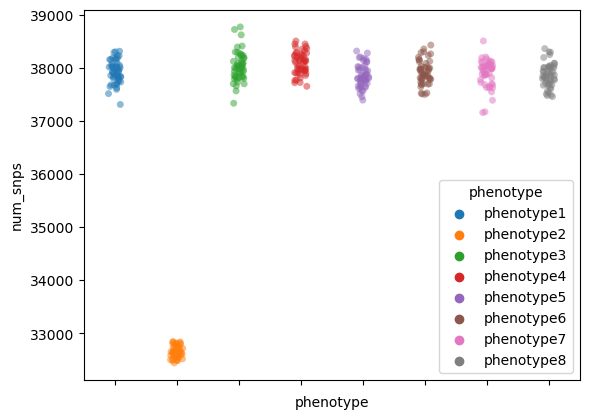

In [22]:
a = sns.stripplot(data=df, x='phenotype', y="num_snps", hue="phenotype", alpha=0.5)
a.set(xticklabels=[])
plt.show()

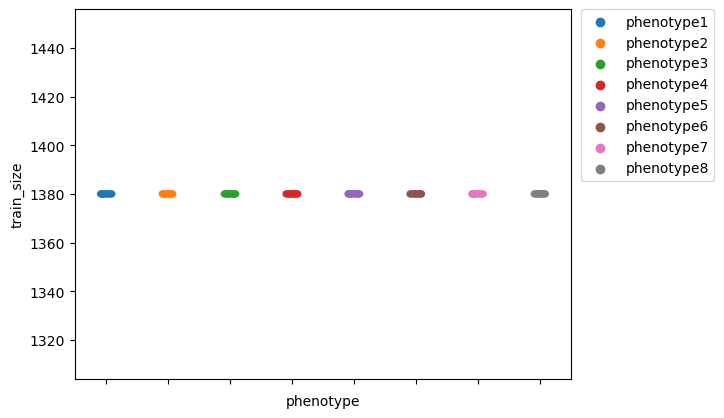

In [23]:
a = sns.stripplot(data=df, x='phenotype', y="train_size", hue="phenotype", alpha=0.5)
a.set(xticklabels=[])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

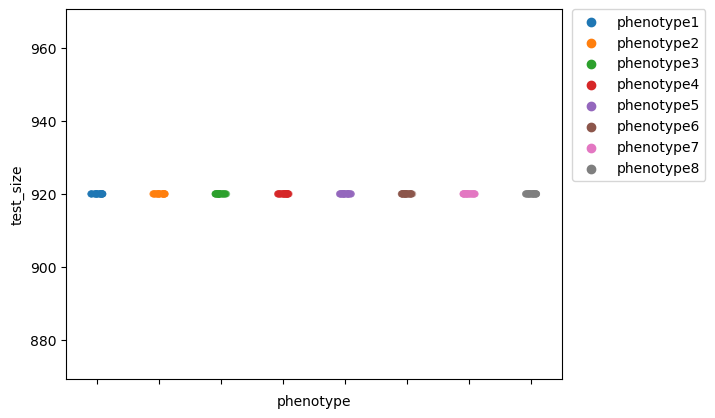

In [24]:
a = sns.stripplot(data=df, x='phenotype', y="test_size", hue="phenotype", alpha=0.5)
a.set(xticklabels=[])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [25]:
df['prune_method'] = 'ldprune'
df.head()

,phenotype,num_snps,pearson_corr,train_size,test_size,prune_method
0,phenotype1,37756,0.273625,1380,920,ldprune
1,phenotype1,38305,0.320360,1380,920,ldprune
2,phenotype1,37972,0.312023,1380,920,ldprune
3,phenotype1,37933,0.273269,1380,920,ldprune
4,phenotype1,37829,0.298620,1380,920,ldprune


In [30]:
randomcompare = pd.read_csv('../data/old/randommatch50.csv')
randomcompare = randomcompare.rename(columns={'outphenos': 'phenotype', 'outrs': 'pearson_corr'})[['phenotype', 'pearson_corr']]
randomcompare['prune_method'] = 'random_42000'
randomcompare.head()

,phenotype,pearson_corr,prune_method
0,phenotype1,0.328031,random_42000
1,phenotype2,0.394695,random_42000
2,phenotype3,0.289066,random_42000
3,phenotype4,0.151093,random_42000
4,phenotype5,0.151679,random_42000


In [31]:
random = pd.read_csv('../data/old/indep_random_results.csv')
random = random.rename(columns={'outphenos': 'phenotype', 'outrs': 'pearson_corr'})[['phenotype', 'pearson_corr']]
random['prune_method'] = 'random'
random.head()

,phenotype,pearson_corr,prune_method
0,phenotype1,0.306523,random
1,phenotype1,0.261574,random
2,phenotype1,0.315902,random
3,phenotype1,0.286828,random
4,phenotype1,0.296841,random


In [33]:
clump = pd.read_csv('../data/old/indep_ldclump.csv')
clump['prune_method'] = 'clump'
clump.head()

,phenotype,num_snps,pearson_corr,prune_method
0,phenotype2,2189,0.351697,clump
1,phenotype2,2172,0.408431,clump
2,phenotype2,1653,0.350645,clump
3,phenotype2,2059,0.377716,clump
4,phenotype2,2075,0.343108,clump


<AxesSubplot:xlabel='num_snps', ylabel='Count'>

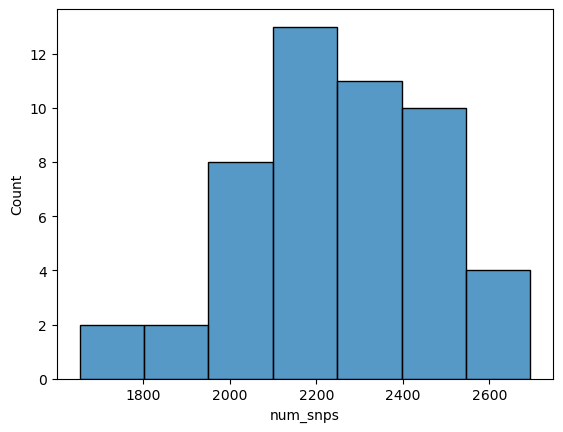

In [34]:
sns.histplot(clump.num_snps)

In [43]:
comparedf = pd.concat([df[['phenotype', 'pearson_corr', 'prune_method']], random, clump])
comparedf['axis'] = 'prune_method'
comparedf.head()

,phenotype,pearson_corr,prune_method,num_snps,axis
0,phenotype1,0.273625,ldprune_indep,NaN,prune_method
1,phenotype1,0.320360,ldprune_indep,NaN,prune_method
2,phenotype1,0.312023,ldprune_indep,NaN,prune_method
3,phenotype1,0.273269,ldprune_indep,NaN,prune_method
4,phenotype1,0.298620,ldprune_indep,NaN,prune_method


In [37]:
ldprune = pd.read_csv('../data/old/window50.csv')
ldprune["prune_method"] = "ldprune_dep"
ldcompare = ldprune[(ldprune.pairwise_r2 == 0.99) & (ldprune.window_size==1000)][['phenotype', 'pearson_corr', 'prune_method']].reset_index(drop=True)
df.prune_method = "ldprune_indep"
random.prune_method = "random_38000"
comparefull = pd.concat([df[['phenotype', 'pearson_corr', 'prune_method']], random, ldcompare, randomcompare])
comparefull['axis'] = 'prune_method'
comparefull.head()

,phenotype,pearson_corr,prune_method,axis
0,phenotype1,0.273625,ldprune_indep,prune_method
1,phenotype1,0.320360,ldprune_indep,prune_method
2,phenotype1,0.312023,ldprune_indep,prune_method
3,phenotype1,0.273269,ldprune_indep,prune_method
4,phenotype1,0.298620,ldprune_indep,prune_method


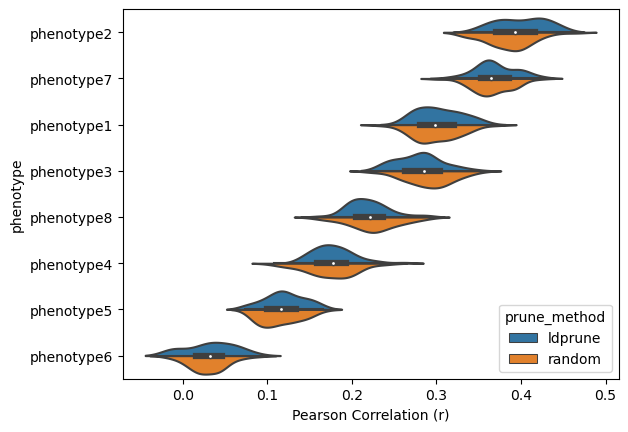

In [40]:
ax = sns.violinplot(data=comparedf.sort_values(by=['pearson_corr'], ascending=False), y='phenotype', x="pearson_corr", hue='prune_method', hue_order=['ldprune', 'random'], split=True, orient = 'h')
# plt.xticks(rotation=55)
plt.xlabel("Pearson Correlation (r)")
plt.show()

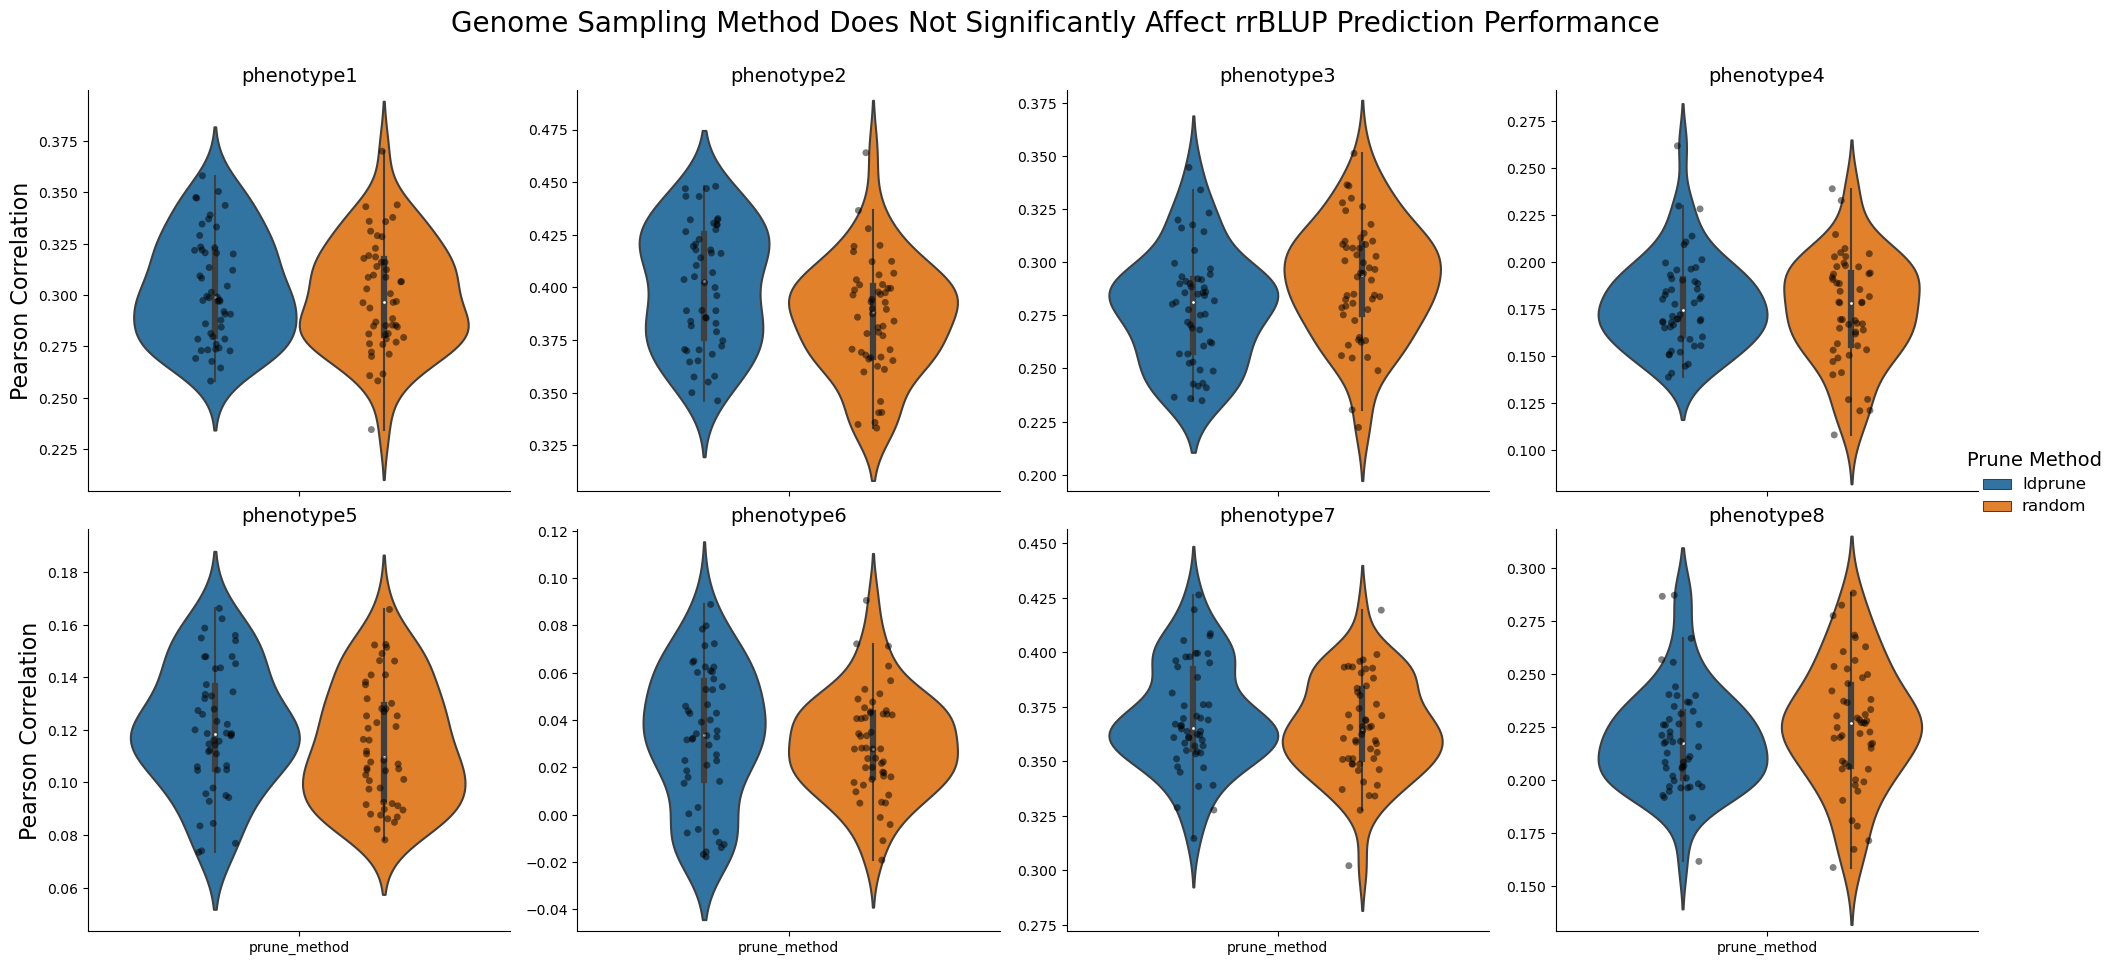

In [41]:
g = sns.catplot(data=comparedf[comparedf.prune_method != 'clump'], kind='violin', x='axis', y='pearson_corr', col='phenotype', hue='prune_method', sharey=False, col_wrap=4)

for i, ax in enumerate(g.axes.flat):
    category = ax.get_title().split(" = ")[1]
    category_data = comparedf[comparedf['phenotype'] == category]
    
    # Overlay stripplot on violinplot
    sns.stripplot(data=category_data[category_data.prune_method != 'clump'], x='axis', y='pearson_corr', hue='prune_method', dodge=True, alpha=0.5, jitter=True, ax=ax, legend=False, palette = ['black', 'black'])
    
    ymin, ymax = category_data['pearson_corr'].min(), category_data['pearson_corr'].max()
    ax.set_ylim(ymin-0.03, ymax+0.03)
    ax.set_title(category, fontsize=14)
    
    if i % 4 == 0: ax.set_ylabel("Pearson Correlation", fontsize=16)
    else: ax.set_ylabel("")
    ax.set_xlabel("")

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Genome Sampling Method Does Not Significantly Affect rrBLUP Prediction Performance', fontsize=20)

legend = g._legend
legend.set_title("Prune Method", prop={'size': 14})

for label in legend.get_texts():
    label.set_fontsize(12)

plt.show()

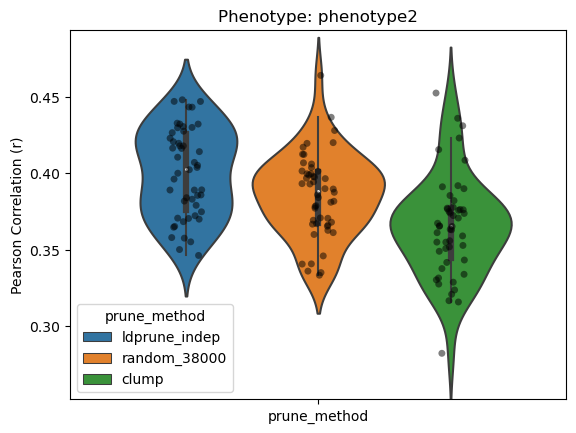

In [44]:
ax = sns.violinplot(comparedf[comparedf.phenotype=='phenotype2'], x='axis', y='pearson_corr', hue='prune_method')
sns.stripplot(comparedf[comparedf.phenotype=='phenotype2'], x='axis', y='pearson_corr', hue='prune_method', alpha=0.5, jitter=True, dodge=True, palette = ['black', 'black', 'black'], legend=False)
plt.title("Phenotype: phenotype2")
plt.xlabel('')
plt.ylabel('Pearson Correlation (r)')
ymin, ymax = comparedf[comparedf.phenotype=='phenotype2']['pearson_corr'].min(), comparedf[comparedf.phenotype=='phenotype2']['pearson_corr'].max()
ax.set_ylim(ymin-0.03, ymax+0.03)
plt.show()

In [48]:
from scipy.stats import ttest_ind
pvals = []
sig = []
for phenotype in comparedf.phenotype.unique():
    pdata = comparedf[comparedf.phenotype == phenotype]
    ttest = ttest_ind(pdata[pdata.prune_method == 'ldprune_indep'].pearson_corr, pdata[pdata.prune_method == 'random_38000'].pearson_corr, equal_var = False)
    pvals.append(ttest.pvalue)
    sig.append(ttest.pvalue <= 0.05/8)
pd.DataFrame({'phenotype': comparedf.phenotype.unique(), 'pval': pvals, 'significant': sig}).sort_values(by='pval')

,phenotype,pval,significant
1,phenotype2,0.009789,False
2,phenotype3,0.025729,False
4,phenotype5,0.189726,False
7,phenotype8,0.234657,False
6,phenotype7,0.305039,False
3,phenotype4,0.457966,False
0,phenotype1,0.496337,False
5,phenotype6,0.531139,False


In [49]:
comparedf.groupby(by=['phenotype', 'prune_method']).agg({'pearson_corr': ['mean', 'std']})

pearson_corr          
                                 mean       std
phenotype  prune_method                        
phenotype1 ldprune_indep     0.303099  0.026043
           random_38000      0.299505  0.026594
phenotype2 clump             0.364805  0.032890
           ldprune_indep     0.400520  0.029036
           random_38000      0.385693  0.027205
phenotype3 ldprune_indep     0.278875  0.026538
           random_38000      0.291074  0.027318
phenotype4 ldprune_indep     0.178307  0.024638
           random_38000      0.174338  0.028484
phenotype5 ldprune_indep     0.120528  0.023707
           random_38000      0.114405  0.022649
phenotype6 ldprune_indep     0.033053  0.028979
           random_38000      0.029833  0.021723
phenotype7 ldprune_indep     0.370108  0.024321
           random_38000      0.365282  0.022439
phenotype8 ldprune_indep     0.219145  0.024514
           random_38000      0.225619  0.029390

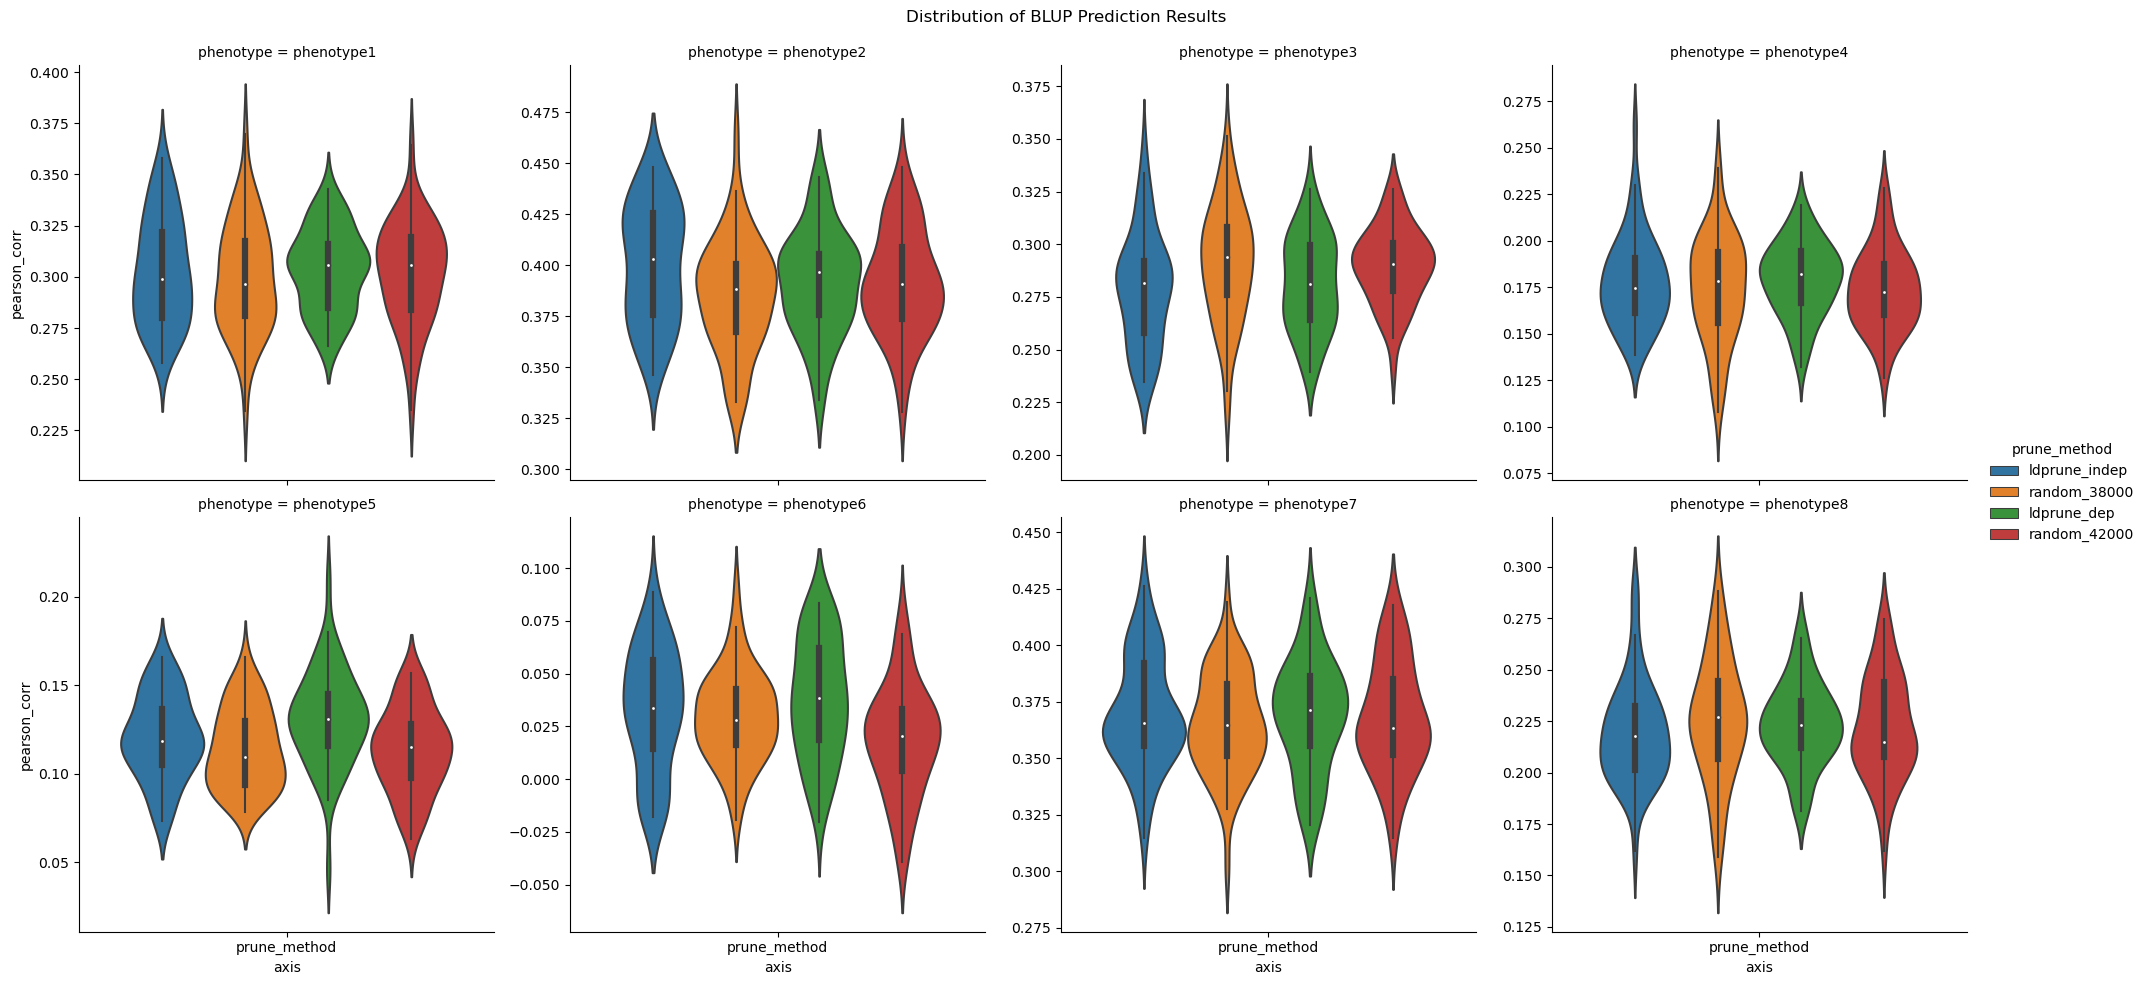

In [50]:
ax = sns.catplot(data=comparefull, kind='violin', x='axis', y="pearson_corr", col='phenotype', hue='prune_method', sharey=False, col_wrap=4)
ax.fig.subplots_adjust(top=0.925) # adjust the Figure in rp
ax.fig.suptitle('Distribution of BLUP Prediction Results')
plt.show()

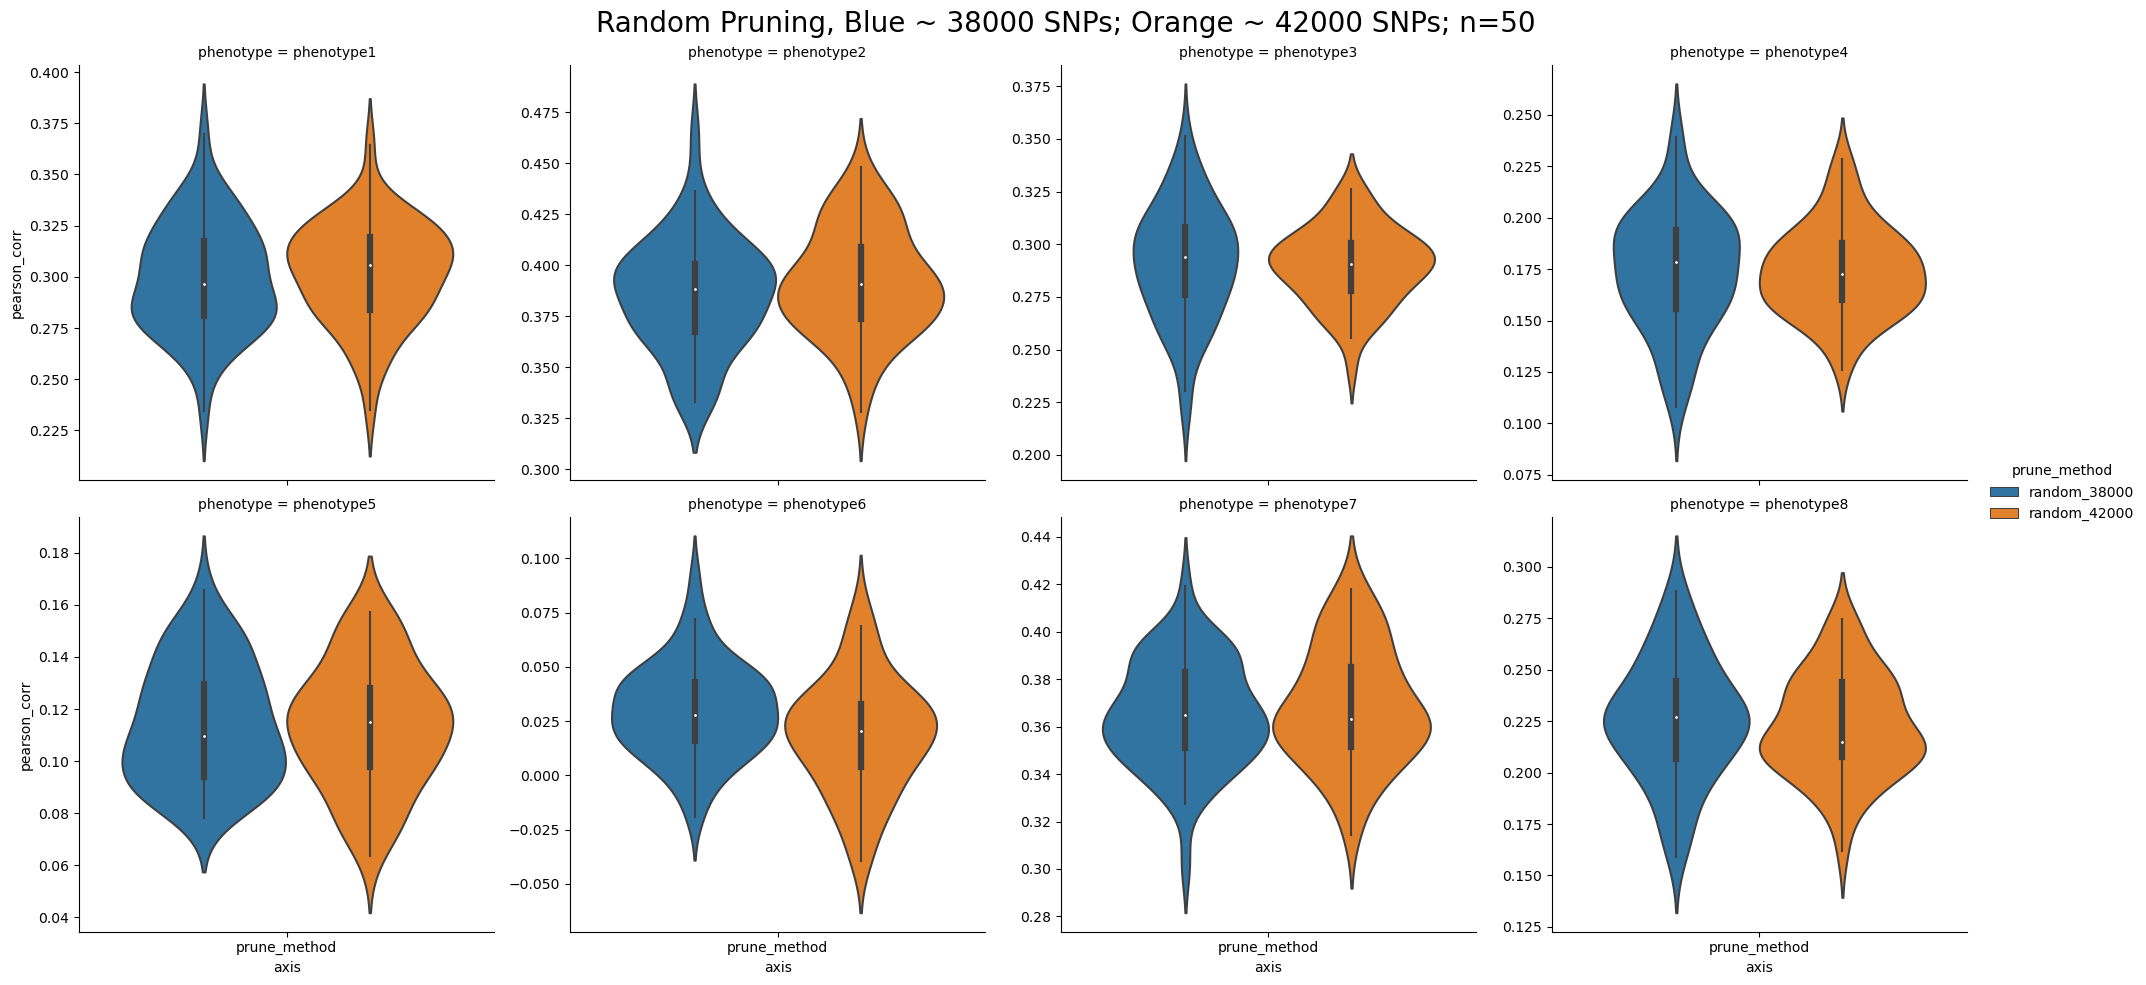

In [51]:
ax = sns.catplot(data=comparefull[(comparefull.prune_method == 'random_42000') | (comparefull.prune_method == 'random_38000')], kind='violin', x='axis', y="pearson_corr", col='phenotype', hue='prune_method', sharey=False, col_wrap=4)
ax.fig.subplots_adjust(top=0.925) # adjust the Figure in rp
ax.fig.suptitle('Random Pruning, Blue ~ 38000 SNPs; Orange ~ 42000 SNPs; n=50', fontsize=20)
plt.show()

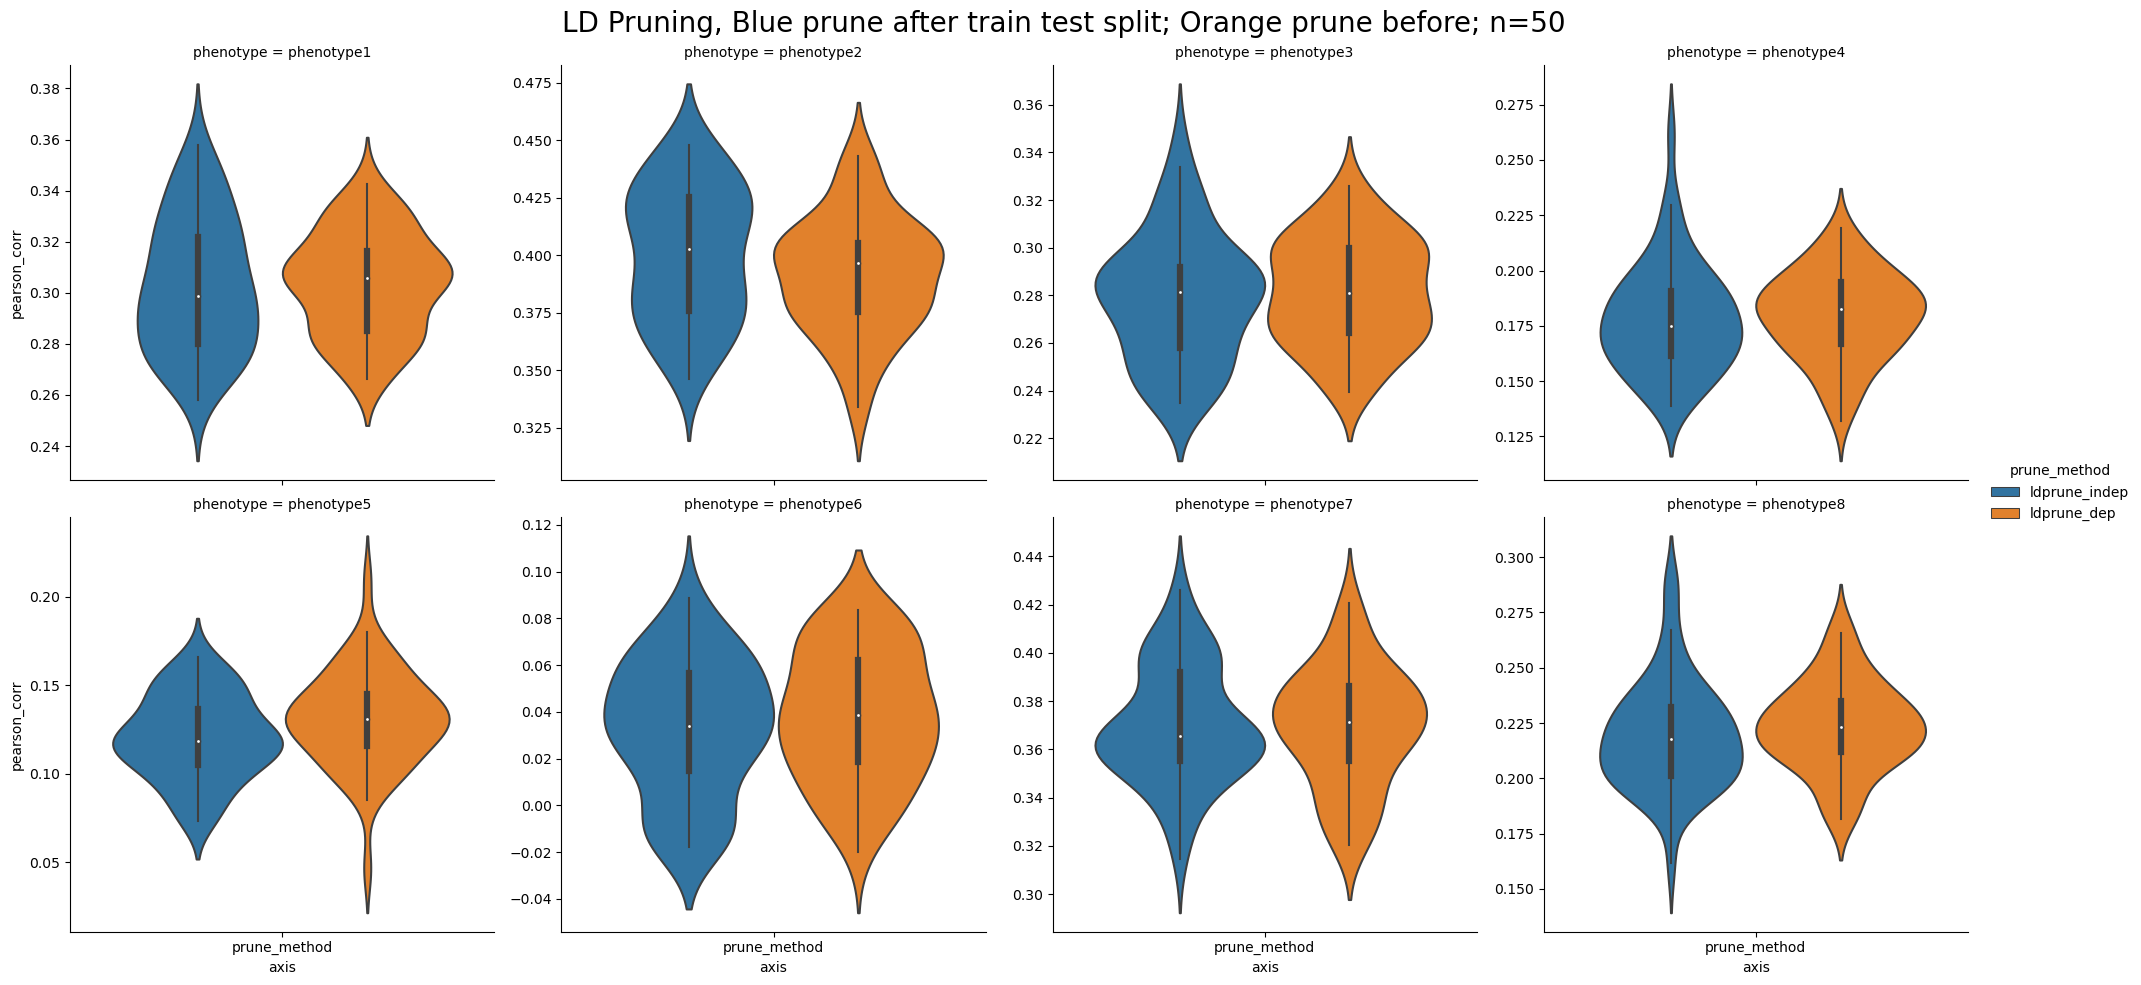

In [52]:
ax = sns.catplot(data=comparefull[(comparefull.prune_method == 'ldprune_dep') | (comparefull.prune_method == 'ldprune_indep')], kind='violin', x='axis', y="pearson_corr", col='phenotype', hue='prune_method', sharey=False, col_wrap=4)
ax.fig.subplots_adjust(top=0.925) # adjust the Figure in rp
ax.fig.suptitle('LD Pruning, Blue prune after train test split; Orange prune before; n=50', fontsize=20)
plt.show()

In [53]:
timedf.head()

,phenotype,num_snps,overall_runtime,data_setup_runtime,model_runtime
0,phenotype1,37756,102.521367,85.977922,16.542316
1,phenotype1,38305,67.171629,48.837256,18.333745
2,phenotype1,37972,66.466926,48.793710,17.672757
3,phenotype1,37933,68.891544,49.759060,19.131902
4,phenotype1,37829,66.662284,48.948615,17.713181


In [54]:
timedf.groupby('phenotype').median()

,num_snps,overall_runtime,data_setup_runtime,model_runtime
phenotype,,,,
phenotype1,37930.0,68.916086,48.942331,19.700574
phenotype2,32643.0,65.444072,48.057217,17.055477
phenotype3,38011.5,69.859576,49.272021,20.568358
phenotype4,38116.0,69.582337,49.191988,20.447104
phenotype5,37823.0,68.330075,48.599227,19.596658
phenotype6,37891.0,63.367285,45.563163,17.823112
phenotype7,37985.0,67.138377,48.661937,18.728246
phenotype8,37858.0,67.310470,48.956383,18.852207


In [55]:
timedf.overall_runtime.sum()

27120.999957084656

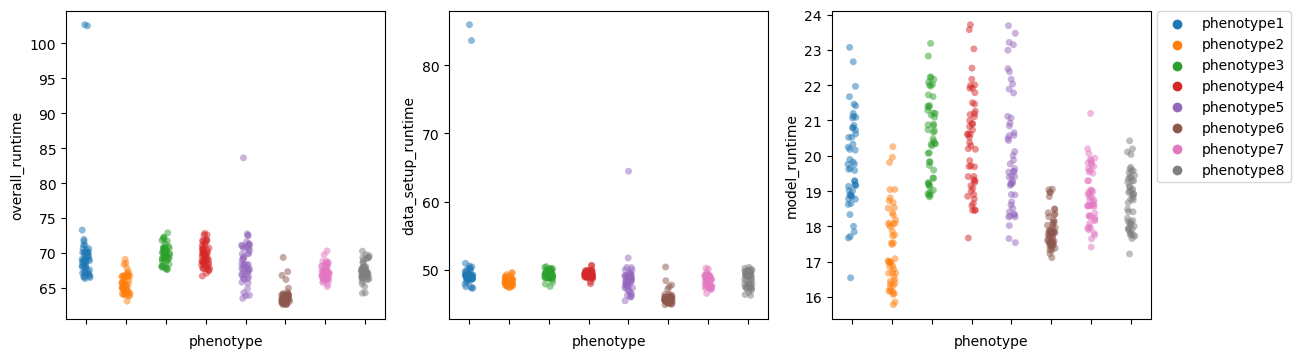

In [63]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
a = sns.stripplot(data=timedf, x='phenotype', y="overall_runtime", hue="phenotype", alpha=0.5, legend=False)
a.set(xticklabels=[])
plt.subplot(1, 3, 2)
a = sns.stripplot(data=timedf, x='phenotype', y="data_setup_runtime", hue="phenotype", alpha=0.5, legend=False)
a.set(xticklabels=[])
plt.subplot(1, 3, 3)
a = sns.stripplot(data=timedf, x='phenotype', y="model_runtime", hue="phenotype", alpha=0.5)
a.set(xticklabels=[])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [64]:
randomtime = pd.read_csv('../data/old/indep_random_times.csv')
randomtime.rename(columns={'outsnps':'num_snps', 'rprunert':'data_setup_runtime', 'predsrt': 'model_runtime', 'overallrt': 'overall_runtime'}, inplace=True)
snp_phenos = dict(zip(randomtime.num_snps.unique(), df.phenotype.unique()))
randomtime['phenotype'] = randomtime.num_snps.apply(lambda x: snp_phenos[x])
randomtime.head()

,num_snps,data_setup_runtime,model_runtime,overall_runtime,phenotype
0,37930,41.757482,71.449106,113.206936,phenotype1
1,37930,7.970453,63.150550,71.121163,phenotype1
2,37930,8.336159,63.067416,71.403737,phenotype1
3,37930,7.888317,61.060882,68.949359,phenotype1
4,37930,8.081393,60.979022,69.060579,phenotype1


In [65]:
randomtime.groupby('phenotype').median()

,num_snps,data_setup_runtime,model_runtime,overall_runtime
phenotype,,,,
phenotype1,37930.0,8.192958,64.160136,72.221180
phenotype2,32652.0,7.819123,58.040152,65.790451
phenotype3,38031.0,8.339637,68.702096,77.163917
phenotype4,38092.0,8.000402,64.820383,73.039574
phenotype5,37919.0,7.796116,65.141956,73.177656
phenotype6,37855.0,7.785366,64.270380,72.055222
phenotype7,37907.0,7.795236,62.811092,70.738735
phenotype8,37865.0,8.045115,61.189613,69.217597


In [74]:
randomtime.overall_runtime.sum()

29168.156750917435

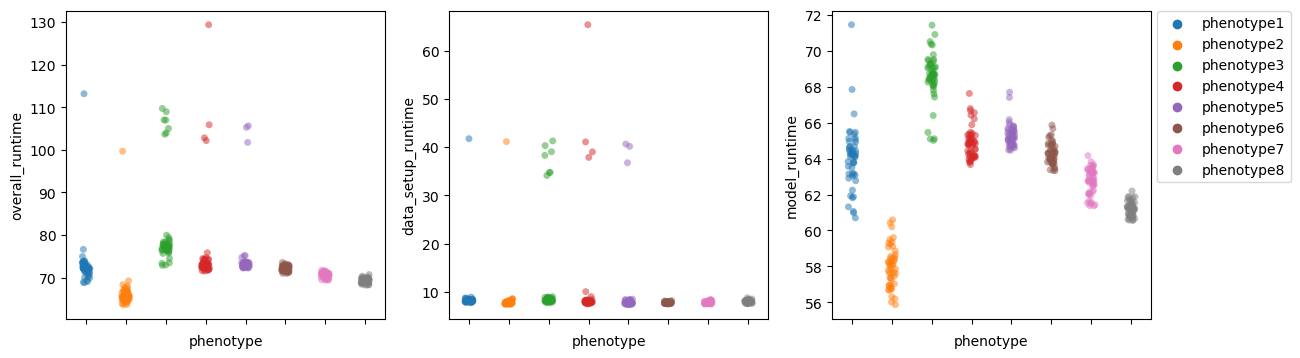

In [66]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
a = sns.stripplot(data=randomtime, x='phenotype', y="overall_runtime", hue="phenotype", alpha=0.5, legend=False)
a.set(xticklabels=[])
plt.subplot(1, 3, 2)
a = sns.stripplot(data=randomtime, x='phenotype', y="data_setup_runtime", hue="phenotype", alpha=0.5, legend=False)
a.set(xticklabels=[])
plt.subplot(1, 3, 3)
a = sns.stripplot(data=randomtime, x='phenotype', y="model_runtime", hue="phenotype", alpha=0.5)
a.set(xticklabels=[])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

## LD Clumping

In [67]:
clumptime = pd.read_csv('../data/old/indep_ldclump_times.csv')
clumptime.rename(columns={'outsnps':'num_snps', 'rprunert':'data_setup_runtime', 'predsrt': 'model_runtime', 'overallrt': 'overall_runtime'}, inplace=True)
snp_phenos = dict(zip(clumptime.num_snps.unique(), df.phenotype.unique()))
clumptime.head()

,phenotype,num_snps,overall_runtime,data_setup_runtime,model_runtime
0,phenotype2,2189,239.963609,237.972656,1.990538
1,phenotype2,2172,249.077670,247.319973,1.757501
2,phenotype2,1653,185.281830,183.710462,1.571189
3,phenotype2,2059,233.998762,232.518455,1.480121
4,phenotype2,2075,207.878963,206.402756,1.476025


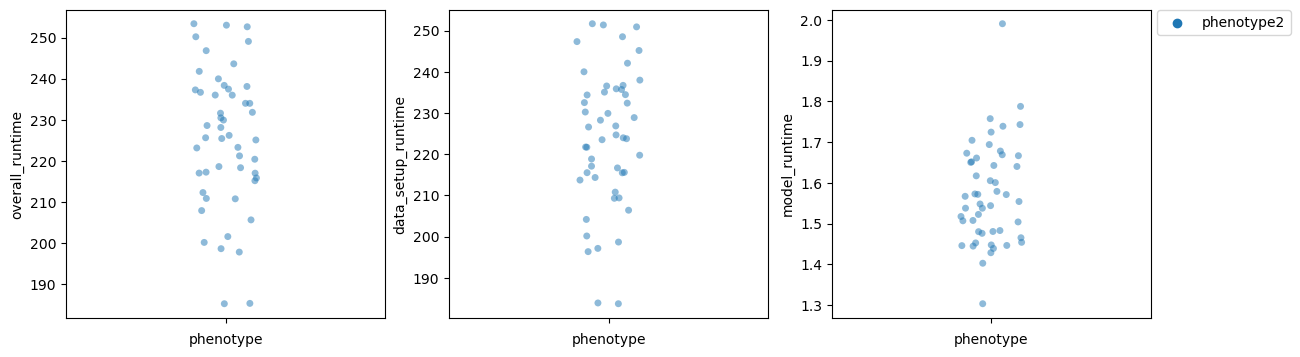

In [68]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
a = sns.stripplot(data=clumptime, x='phenotype', y="overall_runtime", hue="phenotype", alpha=0.5, legend=False)
a.set(xticklabels=[])
plt.subplot(1, 3, 2)
a = sns.stripplot(data=clumptime, x='phenotype', y="data_setup_runtime", hue="phenotype", alpha=0.5, legend=False)
a.set(xticklabels=[])
plt.subplot(1, 3, 3)
a = sns.stripplot(data=clumptime, x='phenotype', y="model_runtime", hue="phenotype", alpha=0.5)
a.set(xticklabels=[])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [70]:
clump_params = pd.read_csv('../data/old/ldclump_params.csv')
clump_params.head()

,Unnamed: 0,num_snps,sample_sizes,p_thresholds,times
0,0,4527,5500,0.01,675.622998
1,1,4740,5500,0.01,678.236020
2,2,5242,5500,0.01,733.148070
3,3,4837,5500,0.01,681.975508
4,4,4985,5500,0.01,694.907826


In [72]:
clump_params.groupby(['sample_sizes', 'p_thresholds']).mean()

Unnamed: 0  num_snps       times
sample_sizes p_thresholds                                  
2500         0.000001          243.25     33.85   61.796611
             0.000010          230.75     73.45   66.341494
             0.000100          218.25    198.50   73.697673
             0.001000          205.75    631.90  109.649392
             0.010000          193.25   2310.80  230.643646
3500         0.000001          180.75     71.60   75.202707
             0.000010          168.25    153.50   83.456409
             0.000100          155.75    396.80  108.908524
             0.001000          143.25   1057.30  167.003325
             0.010000          130.75   3236.05  361.316018
4500         0.000001          118.25    118.95   91.168822
             0.000010          105.75    256.45  107.366084
             0.000100           93.25    577.80  142.192873
             0.001000           80.75   1669.65  261.796722
             0.010000           68.25   4056.75  509.464192
5500         0.000001           55.75    195.15  114.898161
             0.000010           43.25    377.35  139.174910
             0.000100           30.75    829.90  197.606801
             0.001000           18.25   2005.50  355.887199
             0.010000            5.75   4892.70  705.830479

In [73]:
clump_params.p_thresholds.value_counts()

0.010000    80
0.001000    80
0.000100    80
0.000010    80
0.000001    80
Name: p_thresholds, dtype: int64

/home/mhokamoto/miniconda3/envs/python_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  


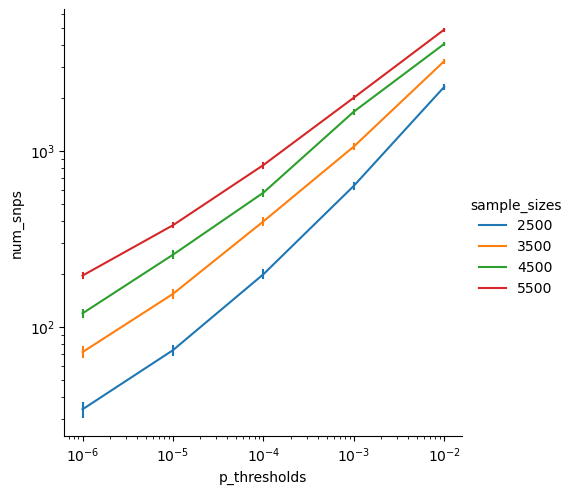

In [75]:
palette = sns.color_palette()
g = sns.relplot(data=clump_params,  kind='line', x='p_thresholds', y='num_snps', hue='sample_sizes', err_style="bars", errorbar="se", markers=False, dashes=False, palette = palette)
# g.map(sns.scatterplot, 'p_thresholds', 'num_snps', hue='sample_sizes', data=c, palette = palette)
# g = sns.relplot(data=c, x='p_thresholds', y='num_snps', hue='sample_sizes'hes=False, palette = palette)

plt.xscale('log')
plt.yscale('log')

In [76]:
preds = pd.read_csv('../data/old/indep_ldclump_param_preds.csv')
preds.head()

,phenotype,num_snps,pearson_corr,sample_sizes,p_thresholds
0,phenotype2,4529,0.477012,5500,0.01
1,phenotype2,4742,0.473145,5500,0.01
2,phenotype2,5244,0.462011,5500,0.01
3,phenotype2,4839,0.471841,5500,0.01
4,phenotype2,4987,0.456641,5500,0.01


<AxesSubplot:xlabel='p_thresholds', ylabel='pearson_corr'>

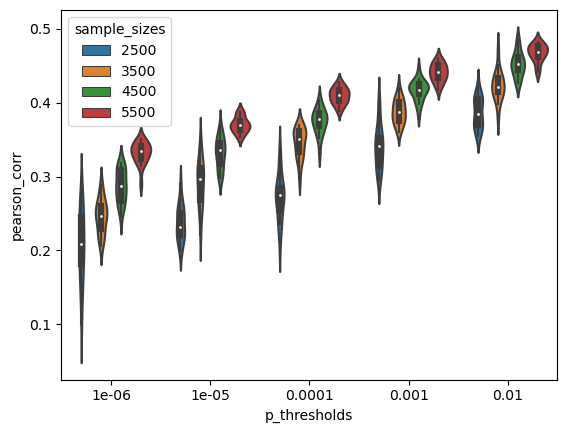

In [77]:
sns.violinplot(data=preds, x='p_thresholds', y='pearson_corr', hue='sample_sizes')

In [83]:
train_size = pd.read_csv('../data/old/train_rat_sizes.csv')
train_size2 = pd.read_csv('../data/old/train_rat_sizes2.csv')
train_size3 = pd.read_csv('../data/old/train_rat_sizes3.csv')
print(len(train_size2.index))

3640


In [81]:
train_full = pd.concat([train_size2, train_size3, train_size[train_size.phenotype.isin(train_size2.phenotype.unique())]])
train_full['r2'] = train_full.pearson_corr**2
train_full.phenotype.value_counts()

phenotype1    1300
phenotype2    1300
phenotype4    1300
phenotype5    1300
Name: phenotype, dtype: int64

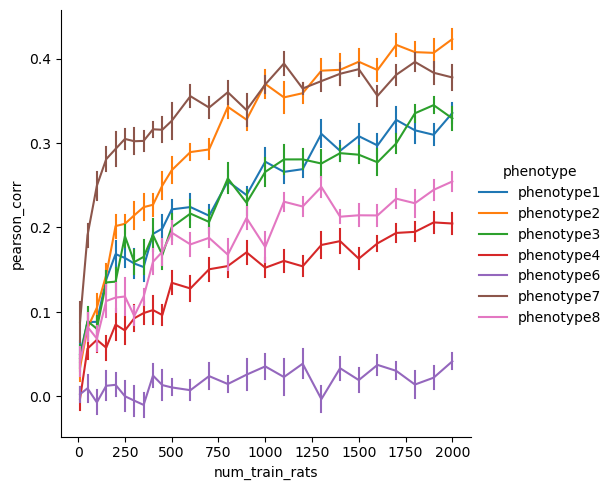

In [84]:
g = sns.relplot(data=train_size,  kind='line', x='num_train_rats', y='pearson_corr', hue='phenotype', err_style="bars", errorbar="se", markers=False, dashes=False)
# g.map(sns.scatterplot, 'num_train_rats', 'pearson_corr', hue='phenotype', data=train_size)

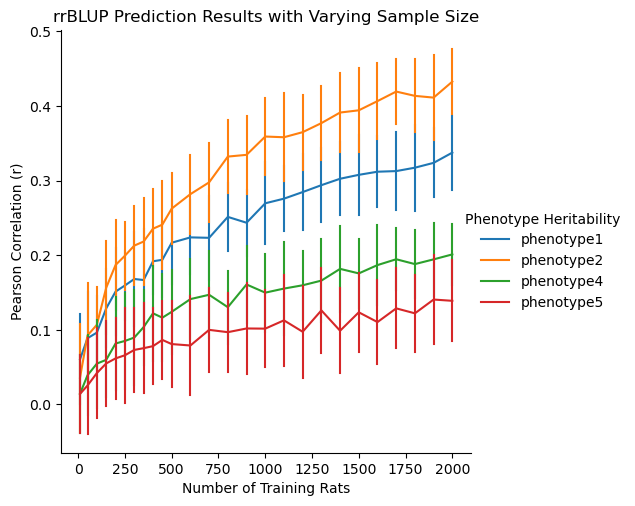

In [92]:
g = sns.relplot(data=train_full,  kind='line', x='num_train_rats', y='pearson_corr', hue='phenotype', err_style="bars", errorbar="sd", markers=False, dashes=False)
g._legend.set_title('Phenotype Heritability')
sns.move_legend(g, "center left", bbox_to_anchor=(.75, .5))
plt.xlabel('Number of Training Rats')
plt.ylabel('Pearson Correlation (r)')
plt.title("rrBLUP Prediction Results with Varying Sample Size")
plt.show()

Text(0.5, 1.0, 'rrBLUP Prediction Results with Varying Sample Size')

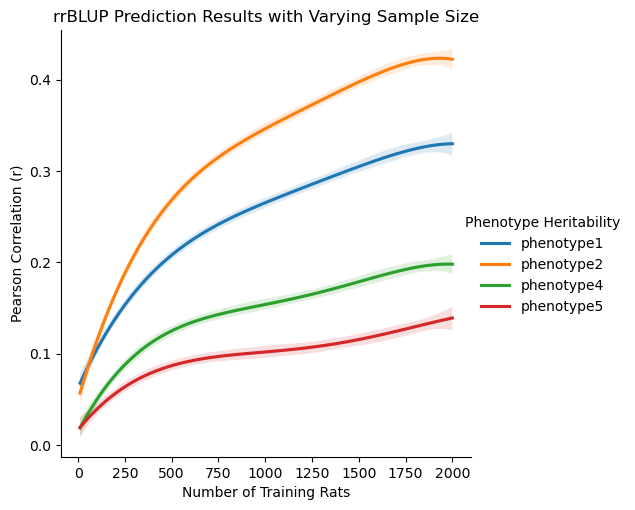

In [93]:
g = sns.lmplot(data=train_full, x='num_train_rats', y='pearson_corr', hue='phenotype', order=4, ci=95, scatter=False)
g._legend.set_title('Phenotype Heritability')
sns.move_legend(g, "center left", bbox_to_anchor=(.75, .5))
plt.xlabel('Number of Training Rats')
plt.ylabel('Pearson Correlation (r)')
plt.title("rrBLUP Prediction Results with Varying Sample Size")

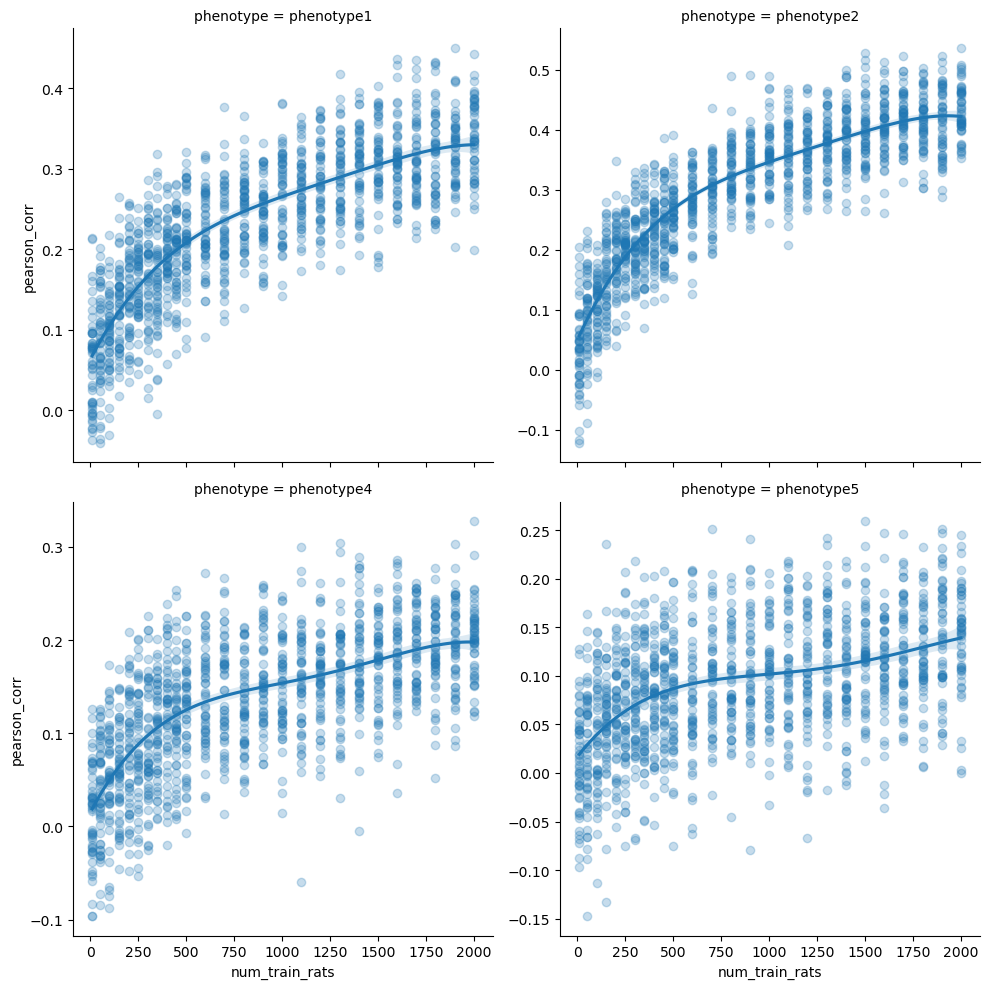

In [94]:
g = sns.lmplot(data=train_full, x='num_train_rats', y='pearson_corr', col='phenotype', col_wrap=2, order=4, x_ci='sd', scatter_kws={'alpha':0.25}, facet_kws={'sharey': False})

In [96]:
preds = pd.read_csv('../data/old/sim_preds.csv')
preds['avg_pred'] = preds[[f'pred_{i}' for i in range(1, 51)]].mean(axis=1)
preds.head()

,actual,rfid,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,...,pred_42,pred_43,pred_44,pred_45,pred_46,pred_47,pred_48,pred_49,pred_50,avg_pred
0,-0.608498,0007219395,-0.647647,-0.581780,-0.574915,-0.522809,-0.522326,-0.599044,-0.579839,-0.600232,...,-0.518005,-0.598265,-0.583432,-0.572098,-0.646612,-0.573750,-0.491884,-0.616990,-0.592215,-0.561071
1,-1.600311,00077E6957,-0.758541,-0.734807,-0.755695,-0.683350,-0.726089,-0.758761,-0.718485,-0.774031,...,-0.642024,-0.713524,-0.787069,-0.808853,-0.731894,-0.741077,-0.699010,-0.765821,-0.700201,-0.724228
2,-1.693844,00077E6961,-1.273509,-1.251721,-1.311919,-1.325586,-1.240079,-1.347042,-1.284396,-1.290107,...,-1.245874,-1.148484,-1.294971,-1.183114,-1.289888,-1.257858,-1.365363,-1.283618,-1.238035,-1.280878
3,-0.773915,00077E75E3,1.055681,1.028436,1.109482,1.152326,1.120278,1.146809,1.070375,1.138885,...,1.022139,1.169846,1.150611,1.116535,1.050262,1.135925,1.094714,1.049826,1.106573,1.098720
4,0.501928,00077E7608,0.012508,0.051259,0.024018,-0.062621,-0.112924,0.047831,-0.036774,-0.015800,...,0.060728,-0.036136,-0.027535,-0.129000,-0.074056,-0.017887,-0.050279,0.038014,-0.045445,-0.024530


In [97]:
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
r2 = r2_score(preds.actual, preds.avg_pred)
print(r2)
r = pearsonr(preds.actual, preds.pred_1)
print(r)
print(r[0]**2)

0.30629947156829596
(0.5682418467827226, 6.982810769693124e-10)
0.3228987964350392


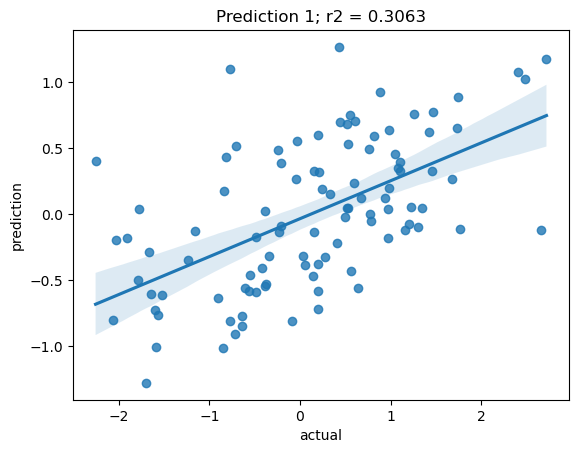

In [95]:
sns.regplot(data=preds, x='actual', y='avg_pred')
plt.title(f'Prediction 1; r2 = {round(r2, 4)}')
plt.ylabel('prediction')
plt.xlabel('actual')
plt.show()

In [97]:
first5rats = preds[:25]
first5rats.head()

,actual,rfid,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,...,pred_42,pred_43,pred_44,pred_45,pred_46,pred_47,pred_48,pred_49,pred_50,avg_pred
0,-0.608498,0007219395,-0.647647,-0.581780,-0.574915,-0.522809,-0.522326,-0.599044,-0.579839,-0.600232,...,-0.518005,-0.598265,-0.583432,-0.572098,-0.646612,-0.573750,-0.491884,-0.616990,-0.592215,-0.561071
1,-1.600311,00077E6957,-0.758541,-0.734807,-0.755695,-0.683350,-0.726089,-0.758761,-0.718485,-0.774031,...,-0.642024,-0.713524,-0.787069,-0.808853,-0.731894,-0.741077,-0.699010,-0.765821,-0.700201,-0.724228
2,-1.693844,00077E6961,-1.273509,-1.251721,-1.311919,-1.325586,-1.240079,-1.347042,-1.284396,-1.290107,...,-1.245874,-1.148484,-1.294971,-1.183114,-1.289888,-1.257858,-1.365363,-1.283618,-1.238035,-1.280878
3,-0.773915,00077E75E3,1.055681,1.028436,1.109482,1.152326,1.120278,1.146809,1.070375,1.138885,...,1.022139,1.169846,1.150611,1.116535,1.050262,1.135925,1.094714,1.049826,1.106573,1.098720
4,0.501928,00077E7608,0.012508,0.051259,0.024018,-0.062621,-0.112924,0.047831,-0.036774,-0.015800,...,0.060728,-0.036136,-0.027535,-0.129000,-0.074056,-0.017887,-0.050279,0.038014,-0.045445,-0.024530


In [149]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaledrats = pd.DataFrame(scaler.fit_transform(first5rats.drop('rfid', axis=1)), columns=first5rats.drop('rfid', axis=1).columns)
scaledrats['rfid'] = first5rats.rfid
scaledrats.head()

,actual,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,...,pred_43,pred_44,pred_45,pred_46,pred_47,pred_48,pred_49,pred_50,avg_pred,rfid
0,-0.557455,-1.044946,-0.949279,-0.921079,-0.846583,-0.859366,-0.969494,-0.962962,-0.997696,-0.844523,...,-1.023529,-0.919674,-0.952882,-1.031435,-0.950954,-0.794321,-1.028893,-0.957008,-0.924524,0007219395
1,-1.477571,-1.231247,-1.214685,-1.222831,-1.114666,-1.199938,-1.242807,-1.203421,-1.291010,-1.169831,...,-1.222536,-1.257934,-1.355856,-1.173731,-1.240156,-1.139245,-1.286529,-1.139820,-1.203014,00077E6957
2,-1.564343,-2.096386,-2.111210,-2.151263,-2.187123,-2.059024,-2.249487,-2.184904,-2.161973,-2.144461,...,-1.973541,-2.101610,-1.992876,-2.104766,-2.133340,-2.248912,-2.182872,-2.050337,-2.153150,00077E6961
3,-0.710915,1.816623,1.843446,1.890465,1.950692,1.886093,2.018055,1.899070,1.937348,1.927746,...,2.029301,1.960744,1.921300,1.799863,2.003982,1.847814,1.856481,1.918924,1.908543,00077E75E3
4,0.472700,0.064106,0.148650,0.078642,-0.078124,-0.175089,0.137455,-0.021103,-0.011371,-0.067351,...,-0.052954,0.003726,-0.198694,-0.076103,0.009778,-0.058924,0.104966,-0.031363,-0.008713,00077E7608


In [124]:
newpreds = preds[['rfid', 'actual', 'avg_pred']]
newpreds.head()

,rfid,actual,avg_pred
0,0007219395,-0.608498,-0.561071
1,00077E6957,-1.600311,-0.724228
2,00077E6961,-1.693844,-1.280878
3,00077E75E3,-0.773915,1.098720
4,00077E7608,0.501928,-0.024530


In [137]:
r2_score(newpreds.actual, newpreds.avg_pred)

0.30629947156829596

In [128]:
newpreds['actual_scaled'] = (newpreds.actual - newpreds.actual.mean())/(newpreds.actual.std())
newpreds['pred_scaled'] = (newpreds.avg_pred - newpreds.avg_pred.mean())/(newpreds.avg_pred.std())
newpreds.head()

/home/mhokamoto/miniconda3/envs/python_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/mhokamoto/miniconda3/envs/python_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,rfid,actual,avg_pred,actual_scaled,pred_scaled
0,0007219395,-0.608498,-0.561071,-0.667374,-1.004207
1,00077E6957,-1.600311,-0.724228,-1.559100,-1.294764
2,00077E6961,-1.693844,-1.280878,-1.643196,-2.286068
3,00077E75E3,-0.773915,1.098720,-0.816098,1.951614
4,00077E7608,0.501928,-0.024530,0.330998,-0.048715


In [138]:
newpreds.describe()

,actual,avg_pred,actual_scaled,pred_scaled
count,100.000000,100.000000,1.000000e+02,1.000000e+02
mean,0.133780,0.002825,3.219647e-17,-2.664535e-17
std,1.112238,0.561533,1.000000e+00,1.000000e+00
min,-2.254995,-1.280878,-2.147719e+00,-2.286068e+00
25%,-0.615106,-0.436408,-6.733148e-01,-7.822023e-01
50%,0.202450,-0.013346,6.174032e-02,-2.879715e-02
75%,0.949548,0.406025,7.334470e-01,7.180345e-01
max,2.720588,1.267156,2.325768e+00,2.251570e+00


In [153]:
scaler = MinMaxScaler()
a = pd.DataFrame(scaler.fit_transform(newpreds[['actual', 'avg_pred']]))
a.head()
r2_score(a[0], a[1])

0.13990852532388487

In [148]:
r2_score(newpreds.actual, newpreds.avg_pred)

0.30629947156829596

In [129]:
melt = pd.melt(scaledrats, id_vars=['actual', 'rfid'], value_vars=[f'pred_{i}' for i in range(1, 51)])
melt.head()

,actual,rfid,variable,value
0,-0.557455,0007219395,pred_1,-1.044946
1,-1.477571,00077E6957,pred_1,-1.231247
2,-1.564343,00077E6961,pred_1,-2.096386
3,-0.710915,00077E75E3,pred_1,1.816623
4,0.472700,00077E7608,pred_1,0.064106


In [115]:
actual = scaledrats[['actual', 'rfid']]
actual.head()

,actual,rfid
0,-0.557455,0007219395
1,-1.477571,00077E6957
2,-1.564343,00077E6961
3,-0.710915,00077E75E3
4,0.472700,00077E7608


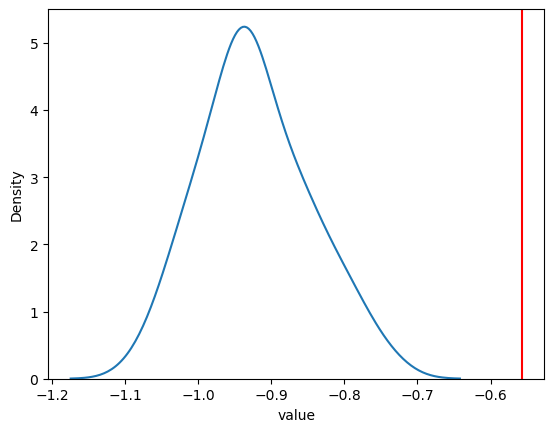

In [116]:
sns.kdeplot(data=melt[melt.rfid=='0007219395'], x='value')
plt.axvline(x = actual[actual.rfid=='0007219395'].actual.item(), color = 'r', linestyle = '-')
plt.show()

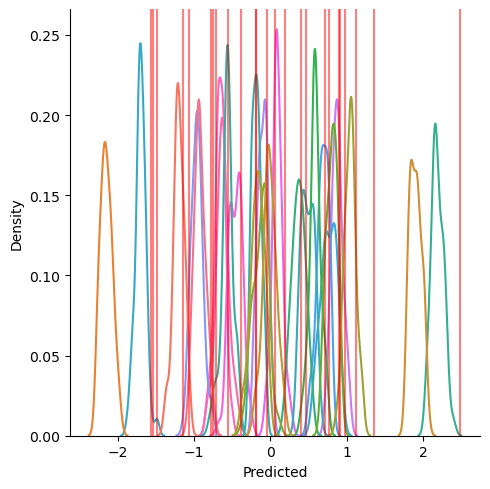

In [117]:
sns.displot(data=melt, x='value', hue='rfid', kind='kde', legend=None)
for i in range(len(actual.index)):
    plt.axvline(x = actual.iloc[i].actual, color = 'r', linestyle = '-', alpha=0.5)
    
plt.xlabel('Predicted')
plt.show()

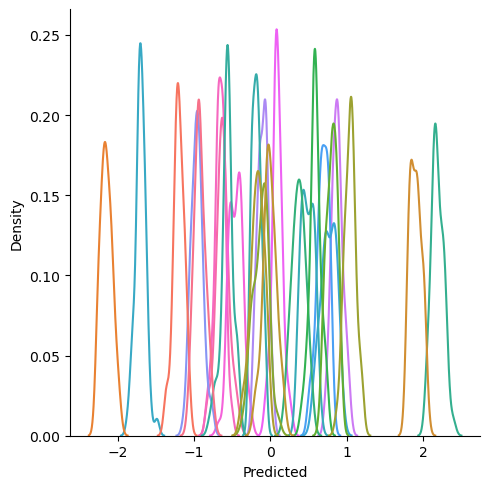

In [39]:
sns.displot(data=melt, x='value', hue='rfid', kind='kde', legend=None)
plt.xlabel('Predicted')
plt.show()

In [163]:
newpreds['difference'] = newpreds.pred_scaled - newpreds.actual_scaled
newpreds.head()

/home/mhokamoto/miniconda3/envs/python_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,rfid,actual,avg_pred,actual_scaled,pred_scaled,difference
0,0007219395,-0.608498,-0.561071,-0.667374,-1.004207,-0.336833
1,00077E6957,-1.600311,-0.724228,-1.559100,-1.294764,0.264336
2,00077E6961,-1.693844,-1.280878,-1.643196,-2.286068,-0.642873
3,00077E75E3,-0.773915,1.098720,-0.816098,1.951614,2.767712
4,00077E7608,0.501928,-0.024530,0.330998,-0.048715,-0.379713


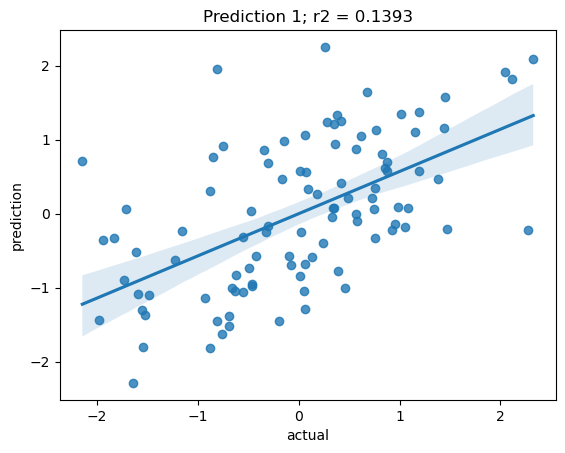

In [162]:
sns.regplot(data=newpreds, x='actual_scaled', y='pred_scaled')
plt.title(f'Prediction 1; r2 = {round(r2_score(newpreds.actual_scaled, newpreds.pred_scaled), 4)}')
plt.ylabel('prediction')
plt.xlabel('actual')
plt.show()

In [167]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(newpreds.actual_scaled, newpreds.pred_scaled)
print(slope, intercept, r_value, p_value, std_err)

0.5696480061378811 -2.7222437835037806e-17 0.5696480061378812 6.20397613354863e-10 0.08302330316483046


Text(0.5, 0, 'y - y-bar')

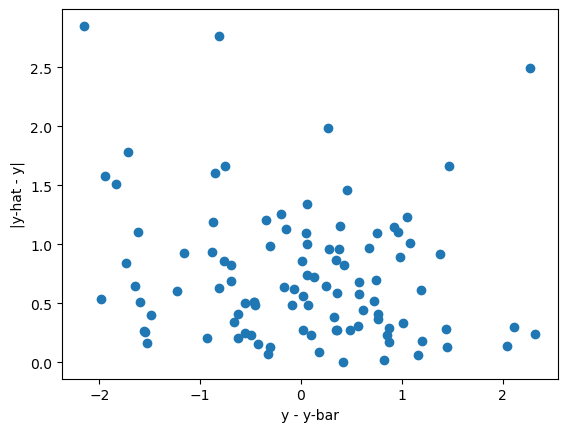

In [170]:
plt.scatter(x=newpreds.actual_scaled-newpreds.actual_scaled.mean(), y=abs(newpreds.pred_scaled - newpreds.actual_scaled))
plt.ylabel('|y-hat - y|')
plt.xlabel('y - y-bar')

In [224]:
newpreds.describe()

,actual,avg_pred,actual_scaled,pred_scaled,difference
count,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,0.133780,0.002825,3.219647e-17,-2.664535e-17,-2.553513e-17
std,1.112238,0.561533,1.000000e+00,1.000000e+00,9.277413e-01
min,-2.254995,-1.280878,-2.147719e+00,-2.286068e+00,-2.491264e+00
25%,-0.615106,-0.436408,-6.733148e-01,-7.822023e-01,-6.343561e-01
50%,0.202450,-0.013346,6.174032e-02,-2.879715e-02,-2.065185e-01
75%,0.949548,0.406025,7.334470e-01,7.180345e-01,5.444348e-01
max,2.720588,1.267156,2.325768e+00,2.251570e+00,2.852000e+00


In [229]:
#np argpartition to get top 10 and bottom 10 rats, then compare overall r2 with r2 of middle and extreme rats
tind = np.argpartition(newpreds.avg_pred, -10)[-10:]
top10 = newpreds.avg_pred[tind]
top10

85    0.752935
91    0.886895
37    0.926496
48    0.776151
86    0.759607
36    1.020783
63    1.076108
3     1.098720
11    1.267156
64    1.172209
Name: avg_pred, dtype: float64

In [230]:
#np argpartition to get top 10 and bottom 10 rats, then compare overall r2 with r2 of middle and extreme rats
bind = np.argpartition(newpreds.avg_pred, 10)[:10]
bottom10 = newpreds.avg_pred[bind]
bottom10

68   -0.809048
55   -0.907636
2    -1.280878
15   -1.016613
41   -1.007886
66   -0.809888
89   -0.848388
95   -0.806248
61   -0.762763
42   -0.775386
Name: avg_pred, dtype: float64

In [240]:
exidxs = np.concatenate((tind.to_numpy(), bind.to_numpy()), axis=None)
mididxs = [i for i in range(100) if i not in exidxs]
print(r2_score(newpreds.iloc[exidxs].actual, newpreds.iloc[exidxs].avg_pred))
print(linregress(newpreds.iloc[exidxs].actual, newpreds.iloc[exidxs].avg_pred).rvalue)
print(r2_score(newpreds.iloc[mididxs].actual, newpreds.iloc[mididxs].avg_pred))
print(linregress(newpreds.iloc[mididxs].actual, newpreds.iloc[mididxs].avg_pred).rvalue)
print(linregress(newpreds.iloc[np.concatenate((exidxs, mididxs), axis=None)].actual, newpreds.iloc[np.concatenate((exidxs, mididxs), axis=None)].avg_pred).rvalue)
print(linregress(newpreds.actual, newpreds.avg_pred).rvalue)

0.6365386417132102
0.8169034321333305
0.1311633394326861
0.3886866444233316
0.5696480061378812
0.569648006137881


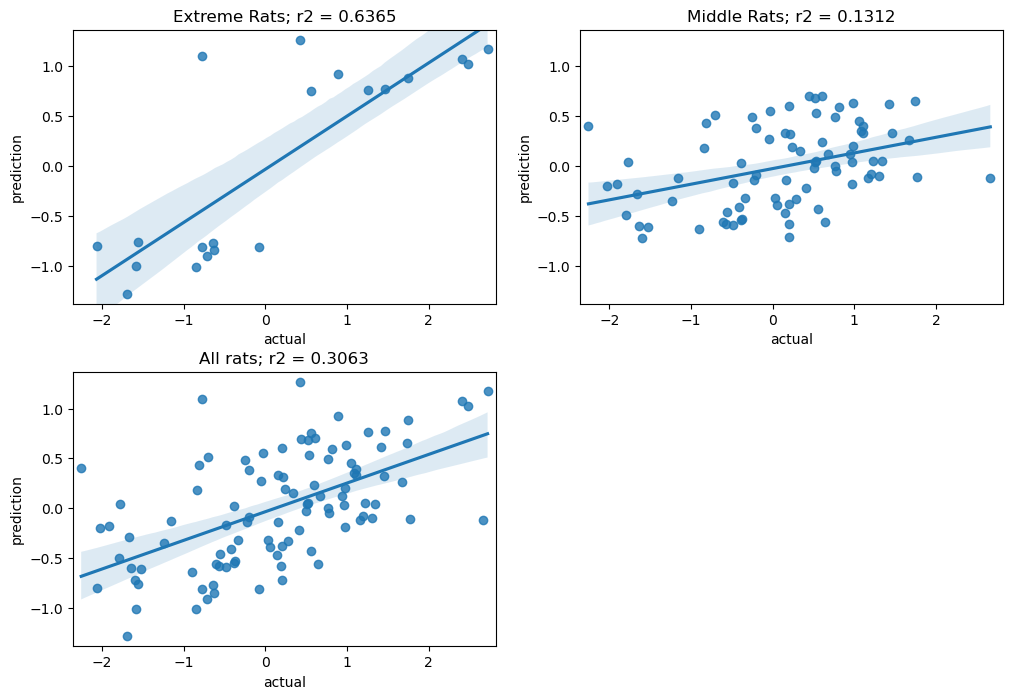

In [258]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.regplot(data=newpreds.iloc[exidxs], x='actual', y='avg_pred')
plt.title(f'Extreme Rats; r2 = {round(r2_score(newpreds.iloc[exidxs].actual, newpreds.iloc[exidxs].avg_pred), 4)}')
plt.ylabel('prediction')
plt.xlabel('actual')
plt.xlim([preds.actual.min()-0.1, preds.actual.max()+0.1])
plt.ylim([preds.avg_pred.min()-0.1, preds.avg_pred.max()+0.1])
plt.subplot(2, 2, 2)
sns.regplot(data=newpreds.iloc[mididxs], x='actual', y='avg_pred')
plt.title(f'Middle Rats; r2 = {round(r2_score(newpreds.iloc[mididxs].actual, newpreds.iloc[mididxs].avg_pred), 4)}')
plt.ylabel('prediction')
plt.xlabel('actual')
plt.xlim([preds.actual.min()-0.1, preds.actual.max()+0.1])
plt.ylim([preds.avg_pred.min()-0.1, preds.avg_pred.max()+0.1])
plt.subplot(2, 2, 3)
sns.regplot(data=preds, x='actual', y='avg_pred')
plt.title(f'All rats; r2 = {round(r2_score(preds.actual, preds.avg_pred), 4)}')
plt.ylabel('prediction')
plt.xlabel('actual')
plt.xlim([preds.actual.min()-0.1, preds.actual.max()+0.1])
plt.ylim([preds.avg_pred.min()-0.1, preds.avg_pred.max()+0.1])
plt.subplots_adjust(hspace=0.25)
plt.show()

In [214]:
newpreds.iloc[np.concatenate((exidxs, mididxs), axis=None)]

,rfid,actual,avg_pred,actual_scaled,pred_scaled,difference
68,00078A0DB4,-0.771913,-0.809048,-0.814298,-1.445815,-0.631517
55,00077EA8C7,-0.714643,-0.907636,-0.762807,-1.621385,-0.858578
2,00077E6961,-1.693844,-1.280878,-1.643196,-2.286068,-0.642873
15,00077E7C86,-0.844054,-1.016613,-0.879159,-1.815455,-0.936296
41,00077E9A7D,-1.587463,-1.007886,-1.547549,-1.799912,-0.252363
...,...,...,...,...,...,...
94,0007D31BB2,-0.555447,-0.459788,-0.619676,-0.823839,-0.204163
96,0007D3B338,1.420695,0.618697,1.157050,1.096770,-0.060280
97,0007D3DF8B,-1.777094,0.039111,-1.718044,0.064621,1.782665
98,0007D60C74,0.604342,0.704825,0.423077,1.250150,0.827074


In [209]:
newpreds

,rfid,actual,avg_pred,actual_scaled,pred_scaled,difference
0,0007219395,-0.608498,-0.561071,-0.667374,-1.004207,-0.336833
1,00077E6957,-1.600311,-0.724228,-1.559100,-1.294764,0.264336
2,00077E6961,-1.693844,-1.280878,-1.643196,-2.286068,-0.642873
3,00077E75E3,-0.773915,1.098720,-0.816098,1.951614,2.767712
4,00077E7608,0.501928,-0.024530,0.330998,-0.048715,-0.379713
...,...,...,...,...,...,...
95,0007D391DE,-2.067386,-0.806248,-1.979042,-1.440828,0.538214
96,0007D3B338,1.420695,0.618697,1.157050,1.096770,-0.060280
97,0007D3DF8B,-1.777094,0.039111,-1.718044,0.064621,1.782665
98,0007D60C74,0.604342,0.704825,0.423077,1.250150,0.827074
